# Estudio de Errores en la alineación del sistema del SLM

**Autor:** Jesús del Hoyo.

**Fecha:** 02/03/2022.

El objetivo de este archivo es estudiar la influencia de los errores en las diferentes maneras de alinear el SLM. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
from slm_alignment_errors import *

import matplotlib.pyplot as plt

# Experimento 1: Medir la retardancia de una lámina retardadora

Este experimento trata de medir la retardancia de una lámina retardadora (omo una lámina de cuarto de onda).

## Método 1: Ajuste de curva de intensidad

Aquí vamos a medir la potencia que atraviesa un sistema formado por un polarizador, la lámina retardadora (giratoria) y un segundo polarizador a 90º del primero. El caso ideal sigue la siguiente curva:

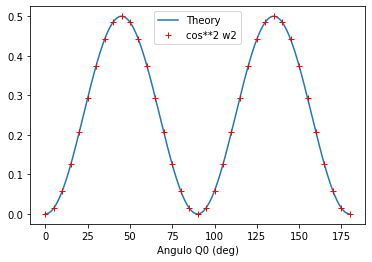

In [14]:
# Angulos pol paralelos, landa cuartos fija de retardancia variable
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().quarter_waveplate(azimuth=angulos)
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    
Sfin = P1 * Q0 * S
I = Sfin.parameters.intensity()
plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend(("Theory", "cos**2 w2"))

Como se puede ver, se ajusta a un coseno cuadrado de doble frecuencia:  $I = I_0 + I_{amp}*\cos^2(2*(\theta-\theta_0))$.

Vamos a ver los efectos de cada una de las variables que pueden cambiar en este método.

### A) Variación del ángulo de origen de la lámina

En primer lugar, voy a variar el ángulo de origen de la lámina retardadora entre 0º y 50º.

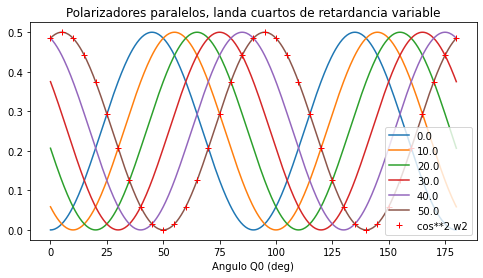

In [24]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    

plt.figure(figsize=(8,4))
angulos0 = np.linspace(0, 50, 6)
for a0 in angulos0:
    Q0 = Jones_matrix().retarder_linear(azimuth=angulos-a0*degrees, R=90*degrees)  
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")
plt.title("Polarizadores paralelos, landa cuartos de retardancia variable")


angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5, 45*degrees + 50*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*angulos0, "cos**2 w2"))

La gráfica se desplaza. Debido a que los picos están separados 90º, se puede discriminar el azimut del eje rápido o del lento, pero no se sabe de cual de los dos. Cuando alineamos las láminas Q1 y Q2 esto es importante, y se hace una nueva medida usando otra lámina externa de referencia. En este caso no es importante, así que se puede evitar ese paso.

### B) Variación de la retardancia

Ahora voy a variar la retardancia de la lámina retardadora entre 80º y 100º.

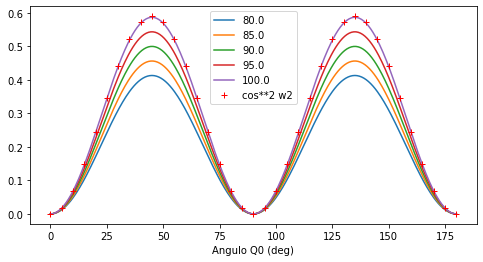

In [30]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    

plt.figure(figsize=(8,4))
angulos0 = np.linspace(80, 100, 5)
for a0 in angulos0:
    Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=a0*degrees)  
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5 + 0.09, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*angulos0, "cos**2 w2"))

La altura cambia

### C) Variación de la transmisión máxima del polarizador

Ahora voy a cambiar la transmisión máxima del polarizador entre 0.9 y 1 (transmisión máxima de campo eléctrico, no de intensidad).

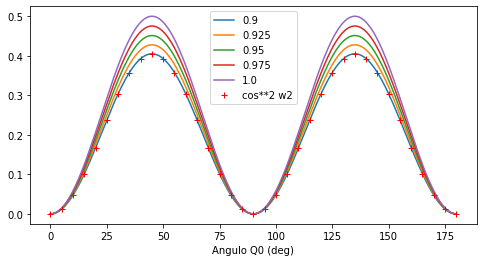

In [39]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(0.9, 1, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=aux, p2=0)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5 - 0.095, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

La altura de la curva baja.

### D) Cambio en el angulo entre polarizadores

Ahora voy a variar el ángulo entre polarizadores entre 80º y 100º.

0.015076844804644279 0.49999999999844585 49.999999999999886


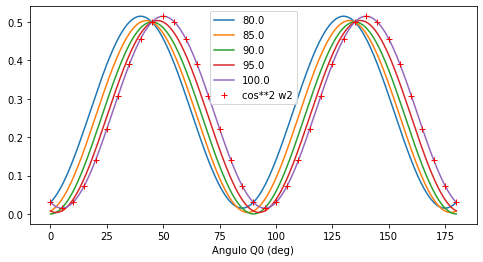

In [42]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(80, 100, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_perfect(azimuth=aux*degrees)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

Afecta únicamente al valor mínimo de la intensidad.

### E) Cambio en la extinción del polarizador

Por último voy a cambiar el valor de transmisión de extinción del polarizador entre 0 y 0.1 (transmisión en campo eléctrico, no en intensidad).

0.03999999999175634 0.4800000000109934 44.999999999999986


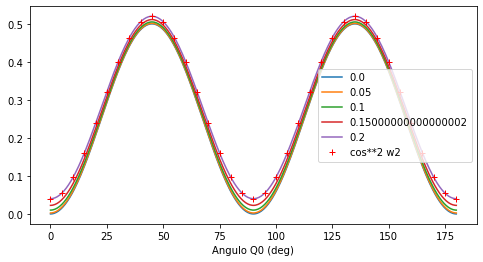

In [45]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  

plt.figure(figsize=(8,4))
param = np.linspace(0, 0.2, 5)
for aux in param:
    P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=1, p2=aux)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

Este valor afecta tanto al valor mínimo como a la amplitud de la curva de intensidad.

### F) Elipticidad del estado inicial

El estado inicial puede ser ligeramente eliptico. Voy a variar esta elipticidad inicial entre 0 y 5º.

0.007596122757472364 0.4924038774975384 45.00000000008299


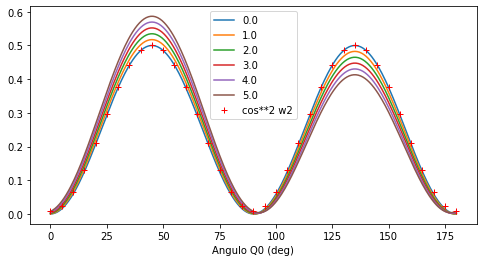

In [46]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
Q0 = Jones_matrix().retarder_linear(azimuth=angulos, R=90*degrees)  
P1 = Jones_matrix().diattenuator_linear(azimuth=90*degrees, p1=1, p2=0)

plt.figure(figsize=(8,4))
param = np.linspace(0, 5, 6)
for aux in param:
    S = Jones_vector().general_azimuth_ellipticity(azimuth=0, ellipticity=aux*degrees)
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

result = least_squares(x0=[0, 0.5, 45*degrees], fun=error_cos2_2, bounds=((0, 0, 0), (0.1, 0.6, 180*degrees)), args=(angulos, I))
print(result.x[0], result.x[1], result.x[2]/degrees)
angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2(result.x, angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*param, "cos**2 w2"))

En este caso lo que ocurre es que cada uno de los dos picos tiene una diferente altura. Puesto que el ajuste evita este efecto, este error es inapreciable en los experimentos.

### G) Retardancia > 90º

Es posible que se puedan confundir retardancias mayores y menores de 90º con un giro adicional de 90º. Vamos a comprobarlo.

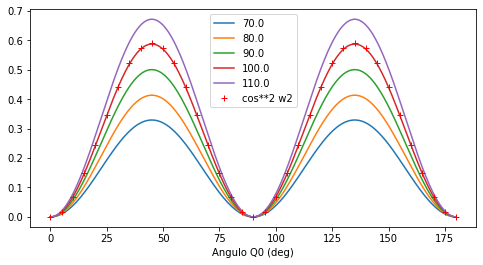

In [4]:
angulos = np.linspace(0*degrees, 180*degrees, 361)
S = Jones_vector().linear_light()
P1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)    

plt.figure(figsize=(8,4))
angulos0 = np.linspace(70, 110, 5)
angulos_az = np.array([0, 0, 0, 90, 90]) * degrees
legend = []
for ind, a0 in enumerate(angulos0):
    Q0 = Jones_matrix().retarder_linear(azimuth=angulos + angulos_az[ind], R=a0*degrees)  
    Sfin = P1 * Q0 * S
    I = Sfin.parameters.intensity()
    plt.plot(angulos/degrees, I)
    legend.append("R = {:.0f}, Az = {:.0f}".format(a0/degrees, angulos_az[ind]/degrees))
plt.ylabel=("I")
plt.xlabel("Angulo Q0 (deg)")

angulos_fit = np.linspace(0*degrees, 180*degrees, 37)
y = cos2_2([0, 0.5 + 0.09, 45*degrees], angulos_fit)
plt.plot(angulos_fit/degrees, y, 'r+')
plt.legend((*angulos0, "cos**2 w2"))

Parece que si se puede distinguir entonces.

### Conclusión

Vamos a recapitular lo que he encontrado:

1. Todas las curvas son del tipo $I = I_0 + I_{amp}*\cos^2(2*(\theta-\theta_0))$ salo si el estado inicial es elíptico. Esta funcion tiene 3 parámetros.
1. Estos tres parámetros son función de las siguientes variables:
    1. $I_0$ es función del ángulo entre polarizadores y de su coeficiente de extinción.
    1. $I_{amp}$ es función de la retardancia y de los coeficiente de transmisión máxima y extinción del polarizador.
    1. $\theta_0$ es función del ángulo de origen de la lámina retardadora y del ángulo entre polarizadores.
    
Por lo tanto, se puede calibrar la lámina retardadora si se conocen los coeficientes de tranmisión máxima y mínima de los polarizadores.

## Análisis de errores

Voy a introducir errores en los diferentes parámetros que introduzco como medidas: intensidad, angulo, p1 y p2 de polarizador, y veo como afecta a los parámetros de ajuste. Los errores los calculo como errores aleatorios (distribución normal).

Parámetros:
* **tipo:** Tipo de error: intensidad, angulos, p1 o p2.
* **Emax:** Error máximo.
* **Ne:** Numero de valores diferentes para el error.
* **N:** Numero de repeticiones para un mismo valor de error.
* **Nm:** Numero de angulos diferentes usados para una sola medida.

A la salida obtengo 3 parámetros:
* **Media**: Media del error. Es esperable que el error final en los parámetros ajustados sea simétrico, y por lo tanto esta media debería ser cercana a 0.
* **Amplitud:** Desviación estandar de los errores obtenidos. Si el error final también sigue una distribución normal, esta std da cuenta del verdadero error que se obtiene al final.
* **Absoluto:** Media de los valores absolutos de los errores, junto con su desviación estándar dividita entre $\sqrt(N)$. Si la distribución de error final no es normal, este es el valor bueno del error, junto con el error del error.

### A) Error en la intensidad (background)

En primer lugar voy a introducir errores en la intensidad. Estos errores se suman a la intensidad medida de manera que se pueden entender como errores de background o de precisión del detector.

Starting multiprocessing
Multiprocessing finished
Execution time: 286 segundos


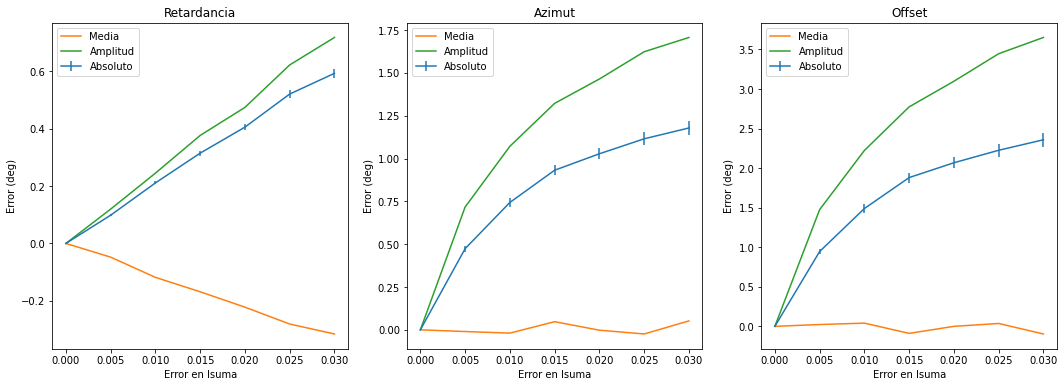

In [9]:
filename = "Error_retardancia_Isuma"
folder = "D:\Codigo_UCM\py_aocg\development\calculo retardancia\Datos guardados"
retardance_1(N_repeat=1024, N_error=7, E_max=0.03, N_angles=37, type="Isuma", verbose=True, filename=filename, folder=folder)
# calcular_errores(N=2048, Ne=11, Nm=35, Emax=0.05, tipo="intensidad");

### B) Error en la intensidad (estabilidad)

Ahora voy a introducir un error multiplicativo en la intensidad. Este error se puede entender como inestabilidades en la potencia de salida del láser de iluminación.

Starting multiprocessing
Multiprocessing finished
Execution time: 488 segundos


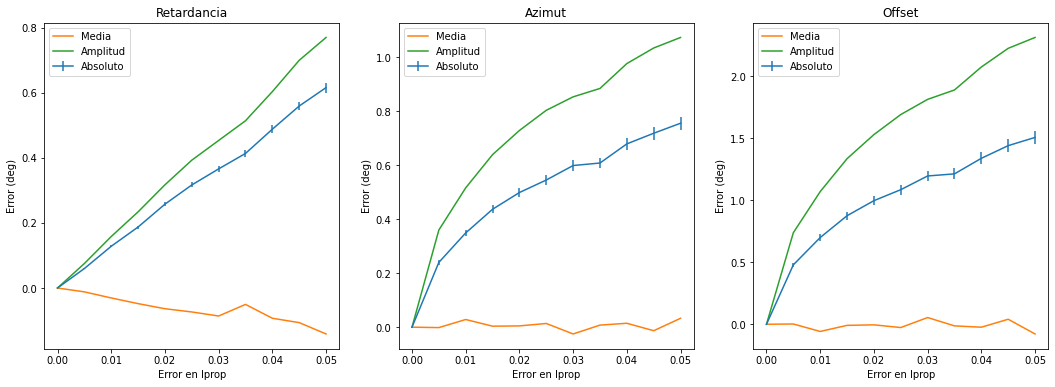

In [10]:
filename = "Error_retardancia_Iprop"
folder = "D:\Codigo_UCM\py_aocg\development\calculo retardancia\Datos guardados"
retardance_1(N_repeat=1024, N_error=11, E_max=0.05, N_angles=37, type="Iprop", verbose=True, filename=filename, folder=folder)

### C) Error en los ángulos

Ahora voy a calcular el error en los ángulos. Esto incluye tanto error en el angulo de medida de las intensidades como en el de colocación del último polarizador.

Starting multiprocessing
Multiprocessing finished
Execution time: 274 segundos


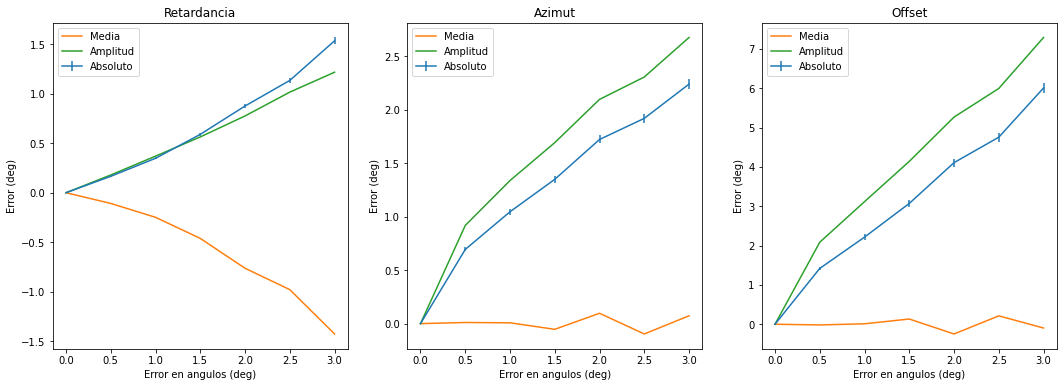

In [11]:
filename = "Error_retardancia_Angulos"
folder = "D:\Codigo_UCM\py_aocg\development\calculo retardancia\Datos guardados"
retardance_1(N_repeat=1024, N_error=7, E_max=3*degrees, N_angles=37, type="angulos", verbose=True, filename=filename, folder=folder)
# calcular_errores(N=2048, Ne=13, Nm=35, Emax=3*degrees, tipo="angulos");

### D) Error en p1

Ahora voy a analizar la influencia del error en la transmisión máxima del polarizador.

Starting multiprocessing
Multiprocessing finished
Execution time: 899 segundos


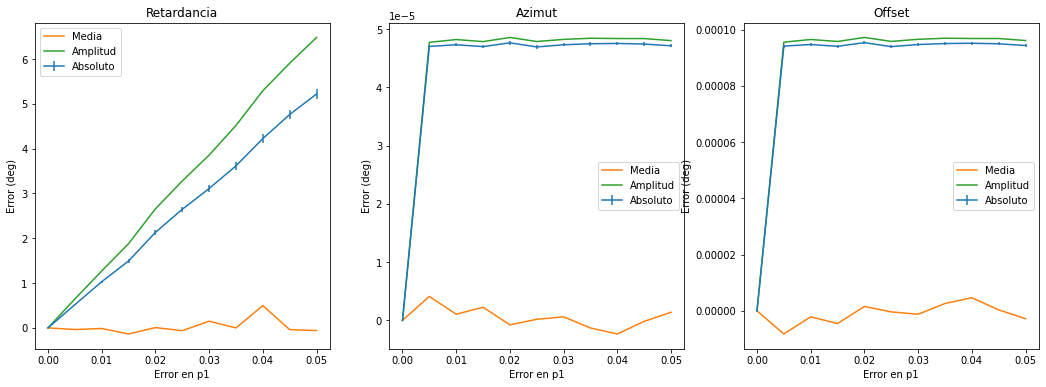

In [12]:
filename = "Error_retardancia_p1"
folder = "D:\Codigo_UCM\py_aocg\development\calculo retardancia\Datos guardados"
retardance_1(N_repeat=1024, N_error=11, E_max=0.05, N_angles=37, type="p1", verbose=True, filename=filename, folder=folder)
# calcular_errores(N=2048, Ne=11, Nm=35, Emax=0.05, tipo="p1");

### E) Error en p2

Lo mismo con la transmisión de extinción del polarizador

Starting multiprocessing
Multiprocessing finished
Execution time: 569 segundos


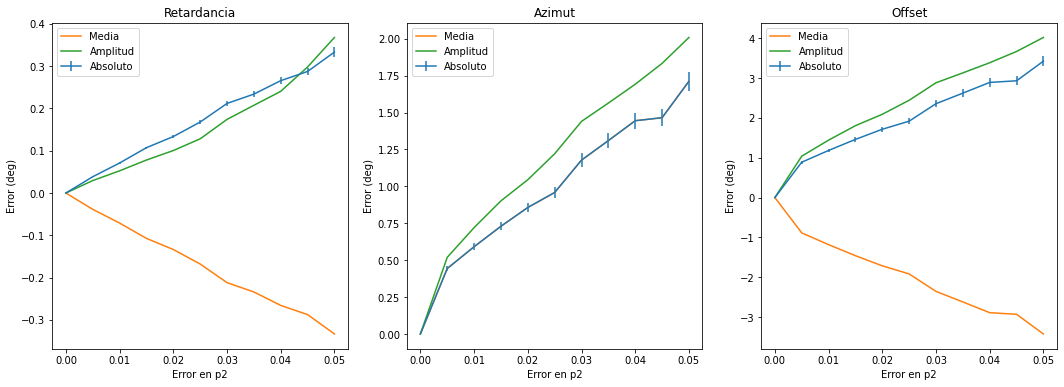

In [13]:
filename = "Error_retardancia_p2"
folder = "D:\Codigo_UCM\py_aocg\development\calculo retardancia\Datos guardados"
retardance_1(N_repeat=1024, N_error=11, E_max=0.05, N_angles=37, type="p2", verbose=True, filename=filename, folder=folder)
# calcular_errores(N=2048, Ne=11, Nm=35, Emax=0.05, tipo="p2");

### F) Influencia del numero de medidas

Resultado antiguo pero nos vale para el proposito que tiene.

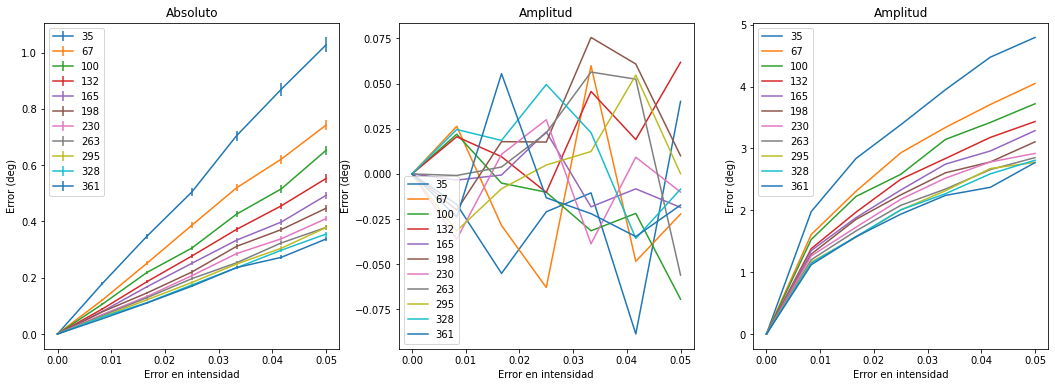

In [44]:
Nm = np.linspace(35, 361, 11, dtype=int)
calcular_errores(N=1024, Ne=6, Nm=Nm, Emax=0.05, tipo="intensidad");

Parece que el error decrece con la raiz del número de medidas, lo que es esperable.

# Experimento 2: Polarizadores cruzados

Vamos a ver el error de intentar colocar dos polarizadores con sus ejes de transmisión paralelos (máxima potencia atraviesa el sistema) o perpendiculares (mínima potencia atraviesa el sistema).

### Metodo 1: Maximizar / minimizar la potencia de cruzar polarizadores

Voy a estudiar el error en el ángulo del polarizador al maximizar / minimizar los errores.

### A) Error en intensidad (background)

Un error que hace aumentar la intensidad independientemente de esta.

In [ ]:
filename = "Error_polarizadores_Isuma"
folder = "D:\Codigo\py_aocg\development\calculo retardancia\Datos guardados"
polarizers_power(N_repeat=1024, N_error=11, E_max=0.05, N_angles=1801, type="Isuma", verbose=True, filename=filename, folder=folder)

Starting multiprocessing


### Metodo 2: Ajuste del angulo inicial